In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.metrics import accuracy_score

In [58]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train['sex']= np.where(train['Sex']=='male', 1, 0)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['sex']= np.where(test['Sex']=='male', 1, 0)
test['Age'].fillna(test['Age'].median(), inplace= True)
test['Fare'].fillna(test['Fare'].median(), inplace= True)
train['Cabin'].fillna('U', inplace=True)
test['Cabin'].fillna('U', inplace=True)
train['Cabin']= train['Cabin'].apply(lambda x: x[0])
test['Cabin']= test['Cabin'].apply(lambda x:x[0])
train['Cabin'].replace({'U':9, 'C':3, 'E':5, 'G':7, 'D':4, 'A':1, 'B':2, 'F':6, 'T':8}, inplace=True)
test['Cabin'].replace({'U':9, 'C':3, 'E':5, 'G':7, 'D':4, 'A':1, 'B':2, 'F':6, 'T':8}, inplace= True)
train['Title']= train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title']= test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
dicte=  {"Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"}
train['Title']= train['Title'].map(dicte)
test['Title']= test['Title'].map(dicte)
test['Title'].fillna('Mrs', inplace=True)
train['Title'].replace({'Royalty':1, 'Officer':2, 'Mr':3, 'Mrs':4, 'Miss':5, 'Master':6}, inplace=True)
test['Title'].replace({'Royalty':1, 'Officer':2, 'Mr':3, 'Mrs':4, 'Miss':5, 'Master':6}, inplace=True)

train_df= pd.get_dummies(train['Embarked'])
test_df= pd.get_dummies(test['Embarked'])

new_train= pd.concat([train, train_df], axis=1)
new_test= pd.concat([test, test_df], axis=1)



X= new_train.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)
Y=new_train['Survived']
tst= new_test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)


,Pclass,Age,SibSp,Parch,Fare,Cabin,sex,Title,C,Q,S
0,3,22.0,1,0,7.2500,9,1,3,0,0,1
1,1,38.0,1,0,71.2833,3,0,4,1,0,0
2,3,26.0,0,0,7.9250,9,0,5,0,0,1
3,1,35.0,1,0,53.1000,3,0,4,0,0,1
4,3,35.0,0,0,8.0500,9,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,9,1,2,0,0,1
887,1,19.0,0,0,30.0000,2,0,5,0,0,1
888,3,28.0,1,2,23.4500,9,0,5,0,0,1
889,1,26.0,0,0,30.0000,3,1,3,1,0,0


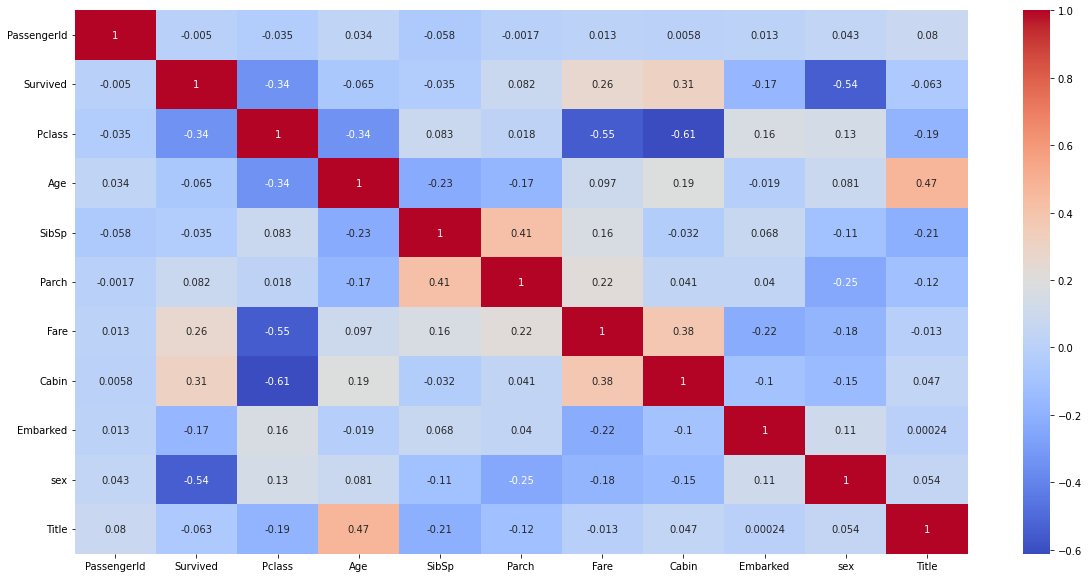

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation= train.corr() 
top_correlation=  correlation.index
plt.figure(figsize=(20,10))
g= sns.heatmap(train[top_correlation].corr(), annot=True, cmap='coolwarm')

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)
scale= StandardScaler().fit(X_train)
X_scale= scale.transform(X_train)

In [17]:
d= KNeighborsClassifier(n_neighbors=13).fit(X_scale, y_train)
prect= d.predict(scale.transform(X_test))
roc_auc_score(y_test, prect)

0.7923946557040084

In [18]:
od= SVC(C=1).fit(X_scale, y_train)
predct= od.predict(scale.transform(X_test))
roc_auc_score(y_test, predct)

0.7983470366563892

In [19]:
md= LogisticRegression().fit(X_scale, y_train)
predit= md.predict(scale.transform(X_test))
roc_auc_score(y_test, predit)tb

0.8019441589585475

In [20]:
mo= DecisionTreeClassifier(max_features=6, max_depth=9, random_state=0).fit(X_scale, y_train)
predic= mo.predict(scale.transform(X_test))
roc_auc_score(y_test, predic)

0.7589071599862967

In [21]:
mod= RandomForestClassifier(max_features=5, max_depth=7, random_state=0).fit(X_scale, y_train)
predict= mod.predict(scale.transform(X_test))
roc_auc_score(y_test, predict)

0.8116221308667352

In [77]:
model= xgboost.XGBClassifier(learning_rate=0.3, min_child_weight=6, eval_metric='auc')
eval_set= [(scale.transform(X_test), y_test)]
model.fit(X_scale, y_train, eval_set= eval_set)

prediction=  model.predict(scale.transform(X_test))

print(model.score(X_scale, y_train))
roc_auc_score(y_test, prediction)

[0]	validation_0-auc:0.89902
[1]	validation_0-auc:0.90155
[2]	validation_0-auc:0.90348
[3]	validation_0-auc:0.90065
[4]	validation_0-auc:0.89855
[5]	validation_0-auc:0.89470
[6]	validation_0-auc:0.89444
[7]	validation_0-auc:0.89534
[8]	validation_0-auc:0.89487
[9]	validation_0-auc:0.89543
[10]	validation_0-auc:0.89705
[11]	validation_0-auc:0.90091
[12]	validation_0-auc:0.89945
[13]	validation_0-auc:0.89975
[14]	validation_0-auc:0.90202
[15]	validation_0-auc:0.90236
[16]	validation_0-auc:0.90215
[17]	validation_0-auc:0.90309
[18]	validation_0-auc:0.90326
[19]	validation_0-auc:0.90283
[20]	validation_0-auc:0.90403
[21]	validation_0-auc:0.90416
[22]	validation_0-auc:0.90493
[23]	validation_0-auc:0.90510
[24]	validation_0-auc:0.90596
[25]	validation_0-auc:0.90596
[26]	validation_0-auc:0.90391
[27]	validation_0-auc:0.90450
[28]	validation_0-auc:0.90373
[29]	validation_0-auc:0.90262
[30]	validation_0-auc:0.90433
[31]	validation_0-auc:0.90219
[32]	validation_0-auc:0.90215
[33]	validation_0-au

0.8366735183281946

In [65]:
params={'learning_rate': [0.10, 0.20, 0.3], 'min_child_weight':[1, 2, 3, 4, 5 ,6]}
classifier= xgboost.XGBClassifier()

In [66]:
random_search= RandomizedSearchCV(classifier, param_distributions= params, scoring='roc_auc', cv=5, verbose=3,
                                 random_state=0)

In [67]:
mode=random_search.fit(X_scale, y_train)
predicting= mode.predict(scale.transform(X_test))
print(roc_auc_score(y_test, predicting))
print(mode.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, min_child_weight=2;, score=0.854 total time=   0.1s
[CV 2/5] END learning_rate=0.1, min_child_weight=2;, score=0.881 total time=   0.1s
[CV 3/5] END learning_rate=0.1, min_child_weight=2;, score=0.838 total time=   0.1s
[CV 4/5] END learning_rate=0.1, min_child_weight=2;, score=0.848 total time=   0.2s
[CV 5/5] END learning_rate=0.1, min_child_weight=2;, score=0.868 total time=   0.1s
[CV 1/5] END learning_rate=0.2, min_child_weight=1;, score=0.845 total time=   0.1s
[CV 2/5] END learning_rate=0.2, min_child_weight=1;, score=0.875 total time=   0.1s
[CV 3/5] END learning_rate=0.2, min_child_weight=1;, score=0.848 total time=   0.1s
[CV 4/5] END learning_rate=0.2, min_child_weight=1;, score=0.830 total time=   0.1s
[CV 5/5] END learning_rate=0.2, min_child_weight=1;, score=0.843 total time=   0.1s
[CV 1/5] END learning_rate=0.2, min_child_weight=3;, score=0.871 total time=   0.1s
[CV 2/5] END le

In [78]:
new_test['Survived']= model.predict(scale.transform(tst))

In [79]:
df= new_test[['PassengerId', 'Survived']]
df= df.set_index('PassengerId')
df[df['Survived']==1]

,Survived
PassengerId,
896,1
900,1
904,1
906,1
907,1
...,...
1301,1
1302,1
1303,1


In [76]:
  df.to_csv('submission.csv')